In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/machine learning/ml_in_class/CNN

/content/drive/MyDrive/machine learning/ml_in_class/CNN


In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
BS = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images("data"))
data = []
labels = []
len(imagePaths)

[INFO] loading images...


2384

In [ ]:
def increase(link_data, link_save, name):
  datagen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range=7)

  img = load_img(link_data)  # this is a PIL image
  x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  for batch in datagen.flow(x, batch_size=1, save_to_dir=link_save, save_prefix=name, save_format='jpg'):
    i += 1
    if i > 1:
        break  # otherwise the generator would loop indefinitely

In [ ]:
ls

chart.png  data/  data_new/  mask_detector.model  predict/  train_mode11l.ipynb


In [ ]:
# for i in list(paths.list_images("data/train/mask")):
#   increase(i, "data_new/mask", "mask")

In [ ]:
# for i in list(paths.list_images("data/validation/mask")):
#   increase(i, "data_new/mask", "mask")

In [ ]:
# for i in list(paths.list_images("data/train/not_mask")):
#   increase(i, "data_new/not_mask", "not_mask")

In [ ]:
# for i in list(paths.list_images("data/validation/not_mask")):
#   increase(i, "data_new/not_mask", "not_mask")

In [ ]:
print("[INFO] loading images...")
ImagePaths = list(paths.list_images("data_new"))
data = []
labels = []
len(ImagePaths)

[INFO] loading images...


4242

In [ ]:
# # loop over the image paths
# for imagePath in ImagePaths_train:
# 	# extract the class label from the filename
# 	label = imagePath.split(os.path.sep)[-2]

# 	# load the input image (224x224) and preprocess it
#   image = cv2.imread(imagePath)
#   image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
#   image = img_to_array(image)

# 	# update the data and labels lists, respectively
# 	data.append(image)
# 	labels.append(label)

# # convert the data and labels to NumPy arrays
# data = np.array(data, dtype="float32")
# labels = np.array(labels)

In [ ]:
for imagePaths in ImagePaths:
  label = imagePaths.split(os.path.sep)[-2]
  image = cv2.imread(imagePaths)
  image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
  image = img_to_array(image)
  data.append(image)
  labels.append(label)
data = np.array(data, dtype = "float32")
labels = np.array(labels)

In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [ ]:
trainY[0]

array([1., 0.], dtype=float32)

In [ ]:
trainX.shape

(3393, 150, 150, 3)

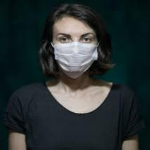

In [ ]:
cv2_imshow(trainX[0])

In [ ]:
# # Add our data-augmentation parameters to ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale = 1./255.,
#                                rotation_range = 40,
#                                width_shift_range = 0.2,
#                                height_shift_range = 0.2,
#                                shear_range = 0.2,
#                                zoom_range = 0.2,
#                                horizontal_flip = True)

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale = 1./255.)

# # Flow training images in batches of 20 using train_datagen generator
# train_generator = train_datagen.flow_from_directory(directory=r"./data/train/",
#                                                     target_size=(224, 224),
#                                                     color_mode="rgb",
#                                                     batch_size=32,
#                                                     class_mode="categorical",
#                                                     shuffle=True,
#                                                     seed=42)     

# # Flow validation images in batches of 20 using test_datagen generator
# validation_generator =  test_datagen.flow_from_directory(directory=r"./data/validation/",
#                                                     target_size=(224, 224),
#                                                     color_mode="rgb",
#                                                     batch_size=32,
#                                                     class_mode="categorical",
#                                                     shuffle=True,
#                                                     seed=42) 

# Now fit the training, validation generators to the CNN model
# history = model.fit_generator(train_generator,
#         validation_data = validation_generator,
#         steps_per_epoch = 100,
#         epochs = 3,
#         validation_steps = 50,
#         verbose = 2,callbacks=[callbacks])

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


# # datagen = ImageDataGenerator(
# #     featurewise_center=True,
# #     featurewise_std_normalization=True,
# #     rotation_range=20,
# #     width_shift_range=0.2,
# #     height_shift_range=0.2,
# #     horizontal_flip=False,
# #     validation_split=0.2)

# datagen = ImageDataGenerator(horizontal_flip=True,
#                              rotation_range=7)

# img = load_img("predict/anh2.jpg")  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in datagen.flow(x, batch_size=1, save_to_dir='predict', save_prefix='gai', save_format='jpg'):
#     i += 1
#     if i > 1:
#         break  # otherwise the generator would loop indefinitely

In [ ]:
# model = tf.keras.models.Sequential([
#     Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),\
#     BatchNormalization(),
#     MaxPooling2D(2,2),

#     Conv2D(64, 3, padding='same', activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2,2),

#     Conv2D(128, 3, padding='same', activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2,2),

#     Conv2D(128, 3, padding='same', activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2,2),

#     Flatten(),
#     Dropout(0.3), 
#     Dense(256, activation='relu'),
#     BatchNormalization(),

#     Dense(128, activation='relu'),
#     BatchNormalization(),

#     Dense(2, activation='softmax') # dense layer has a shape of 2 as we have only 2 classes 
# ])

In [ ]:
# model = tf.keras.models.Sequential([
#     Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#     BatchNormalization(),
#     Conv2D(16, 3, padding='same', activation='relu'),   
#     BatchNormalization(),
#     MaxPooling2D(2,2),
#     Dropout(0.25),

#     Conv2D(32, 3, padding='same', activation='relu'),   
#     BatchNormalization(),
#     Conv2D(32, 3, padding='same', activation='relu'),   
#     BatchNormalization(),
#     MaxPooling2D(2,2),
#     Dropout(0.25),

#     Conv2D(64, 3, padding='same', activation='relu'),
#     BatchNormalization(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2,2),
#     Dropout(0.25),

#     Conv2D(128, 3, padding='same', activation='relu'),
#     BatchNormalization(),
#     Conv2D(128, 3, padding='same', activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2,2),
#     Dropout(0.25),

#     Conv2D(128, 3, padding='same', activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2,2),
#     Dropout(0.25),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(2, activation='sigmoid') # dense layer has a shape of 2 as we have only 2 classes 
# ])

In [ ]:
# model = tf.keras.models.Sequential([
#     Conv2D(32, 3, padding='same',activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#     MaxPooling2D(2,2),
#     Conv2D(64, 3, padding='same',activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(64, 3, padding='same',activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(64, 3, padding='same',activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(128, 3, padding='same', activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(128, 3, padding='same', activation='relu'),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dropout(0.3), 
#     Dense(512, activation='relu'),
#     Dense(2, activation='sigmoid') # dense layer has a shape of 2 as we have only 2 classes 
# ])

In [ ]:
# model = tf.keras.models.Sequential([
#     Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#     Conv2D(32, 3, padding='same', activation='relu'),   
#     BatchNormalization(),
#     MaxPooling2D(2,2),
#     Dropout(0.2),

#     Conv2D(64, 3, padding='same', activation='relu'),   
#     BatchNormalization(),
#     MaxPooling2D(2,2),
#     Dropout(0.2),
  
#     Conv2D(128, 3, padding='same', activation='relu'),   
#     BatchNormalization(),
#     MaxPooling2D(2,2),
#     Dropout(0.2),

#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.3),
#     Dense(2, activation='softmax') # dense layer has a shape of 2 as we have only 2 classes 
# ])

In [2]:
filter_size = (3,3)
pool_size = (2, 2)
model = Sequential([
    Conv2D(30, filter_size, activation='relu', input_shape=(150,150,3), padding='same',strides=2),
    BatchNormalization(),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.2),

    Conv2D(64, filter_size, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.2),
  
    Conv2D(64, filter_size, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.2),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 30)        840       
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 30)       120       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 30)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 37, 37, 30)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 64)        17344     
                                                                 
 batch_normalization_1 (Batc  (None, 35, 35, 64)       2

In [ ]:
trainY

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=40,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
EPOCHS = 40

In [ ]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
# for layer in baseModel.layers:
# 	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/40
106/106 [==============================] - 69s 635ms/step - loss: 0.8094 - accuracy: 0.5963 - val_loss: 0.6380 - val_accuracy: 0.6714
Epoch 2/40
106/106 [==============================] - 67s 633ms/step - loss: 0.6608 - accuracy: 0.6382 - val_loss: 0.5694 - val_accuracy: 0.7456
Epoch 3/40
106/106 [==============================] - 67s 633ms/step - loss: 0.6357 - accuracy: 0.6629 - val_loss: 0.5447 - val_accuracy: 0.7585
Epoch 4/40
106/106 [==============================] - 68s 637ms/step - loss: 0.5975 - accuracy: 0.6793 - val_loss: 0.5091 - val_accuracy: 0.7739
Epoch 5/40
106/106 [==============================] - 68s 642ms/step - loss: 0.5871 - accuracy: 0.6980 - val_loss: 0.4740 - val_accuracy: 0.7856
Epoch 6/40
106/106 [==============================] - 68s 637ms/step - loss: 0.5674 - accuracy: 0.7138 - val_loss: 0.4495 - val_accuracy: 0.8186
Epoch 7/40
106/106 [==============================] - 67s 633ms/step - loss: 0.5536 - accuracy: 0.7254 - v

In [ ]:

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

# serialize the model to disk
print("[INFO] saving mask detector model...")
# model.save("mask_detector.model", save_format="h5")


[INFO] evaluating network...
              precision    recall  f1-score   support

        mask       0.96      0.96      0.96       419
    not_mask       0.96      0.97      0.96       430

    accuracy                           0.96       849
   macro avg       0.96      0.96      0.96       849
weighted avg       0.96      0.96      0.96       849

[INFO] saving mask detector model...


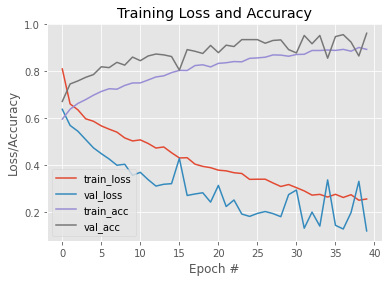

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("chart.png")

In [ ]:
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


# dimensions of our images
img_width, img_height = 150, 150

# load the model we saved
# model = load_model('/content/mask_detector.model')
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

mypath = "predict/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)
# predicting images
mask_count = 0 
not_mask  = 0
for file in onlyfiles:
    img = image.load_img(mypath+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'not_mask')
        not_mask += 1
    else:
        print(file + ": " + 'mask')
        mask_count += 1
print("Total mask :",mask_count)
print("Total not_mask :",not_mask)

['anh1.png', 'anh2.jpg', 'anh5.png', 'anh6.jpg', 'anh3.jpg', 'anh4.jpg']
anh1.png: mask
anh2.jpg: mask
anh5.png: mask
anh6.jpg: mask
anh3.jpg: mask
anh4.jpg: mask
Total mask : 6
Total not_mask : 0


In [ ]:
# from keras.preprocessing import image
# import numpy as np
# from os import listdir
# from os.path import isfile, join
# from keras.models import load_model

# # dimensions of our images
# img_width, img_height = 150, 150

# # load the model we saved
# model = load_model('/content/mask_detector.model')
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

In [ ]:
# model.save('my_model.h5')

In [ ]:
# model.save("mask_detector.model", save_format="h5")